# Author: Anjali Jain
## Data Science and Business Analytics Internship 
## The Spark Foundation
## GRIPNOV2020

# TASK 1: SCORE PREDICTION

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Step1: Importing libraries required for reading, manpulating, and ploting the data.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Step2: Reading Data File from aviable url, Size of Data, and type of the datafile.**

In [2]:
# data reading from the website.
data_url = "http://bit.ly/w-data"
# data importing in a dataframe.
data = pd.read_csv(data_url)
print("Successfully imported the data.")
# checkout the type of data, uploaded in this file.
print("Type of data file:", type(data))
# Size of the data
print("Data Shape or Size:",data.shape)

Successfully imported the data.
Type of data file: <class 'pandas.core.frame.DataFrame'>
Data Shape or Size: (25, 2)


**Step3(a): See the top five rows of data stored in a datafile.**

In [3]:
# viewing the data by default shows the top 5 rows of the data.
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Step3(b): Check out the format of the data stored in a data file.**

In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

**Step3(c): Find out the missing value in the data if it is present or Describe the data file that we have uploaded here.**

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above steps we imported the data successfully and also find out that there is no missing value in the data as count value is 25 for both the columns.
There are other method also, from which you can find the missing value in the data(remove hashtag from the commands for it).
Due to this, data cleaning step is not required.

In [6]:
# check in the data if there is any missing value.
# Method 2
#print("Method 1")
#print(data.isnull())
# Method 3
#print("Method 2")
#data.apply(lambda x: sum(x.isnull()),axis=0) 

**Step4: Data Visualization**<br>
Find out the relationship by viusalizing the graphs.

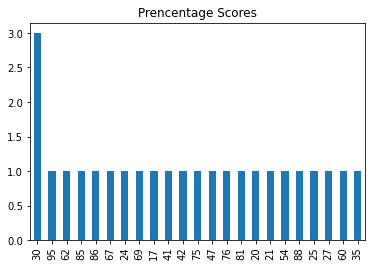

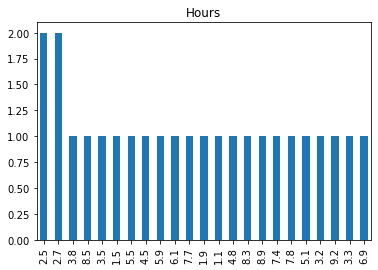

In [7]:
plt.title('Prencentage Scores')
data['Scores'].value_counts().plot.bar()
plt.show()
plt.title('Hours')
data['Hours'].value_counts().plot.bar()
plt.show()

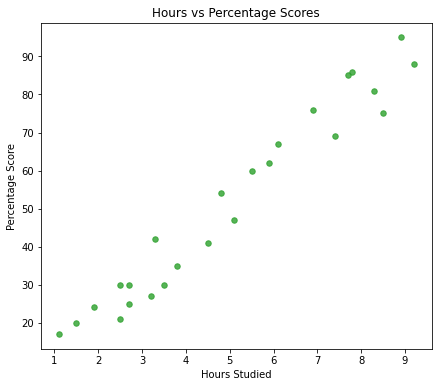

In [9]:
# Plotting the distribution of scores
plt.figure(figsize=(7,6))
x = data["Hours"]
y = data["Scores"]
plt.scatter(x, y, s = 30, c = "#2ca02c", marker = "o", alpha = 0.8)  
plt.title('Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above Graphs, we can clearly seen that there is a positive linear relationship between the number of hours studied and percentage score of the students.

**Step5: Linear Regression Algorithm from scratch.**<br>
Now, we train a algorithm from scratch for comparing the inbuilt model algorithm performance.

In [8]:
# initializing our inputs and outputs
X = data["Hours"].values
Y = data["Scores"].values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print("B0 cofficient Value: ", b0)
print("B1 cofficient Value: ", b1)

B0 cofficient Value:  2.4836734053731746
B1 cofficient Value:  9.775803390787475


Now that we got the value of b0 and b1 cofficient of the linear regression equation that is y = b0 + b1*x. (we have a linear model). Lets plot it graphically.

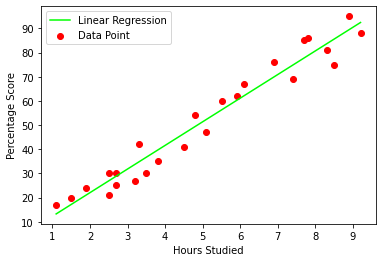

In [9]:
#plotting values 
x_max = np.max(X) 
x_min = np.min(X) 
#calculating line values of x and y
x = np.linspace(x_min, x_max, 5)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Hours Studied')  
#y-axis label
plt.ylabel('Percentage Score') 
plt.legend()
plt.show()

**Root Mean Squared Error:**

In [10]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2   
rmse = np.sqrt(rmse/n)
print(rmse)

5.374265578592621


**R Square Method – Goodness of Fit**<br>
R–squared value is the statistical measure to show how close the data are to the fitted regression line.

In [11]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.9529481969048356


**Linear Regression – Implementation using scikit learn**

**Step6(a): Preparing a Data from making model.**<br>
Choose input and output attributes of the model

In [12]:
#Data Attributes
x = data.iloc[:, :-1].values
#Data Label or target value
y = data.iloc[:, 1].values 

**Step6(b):**<br>
Spilt data for training and test sets.<br>
Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 26) 

Import sklearn library for calling the Linear Regression model and other evaluation performance parameters.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

Create a Linear Regression Model and then train it.

In [15]:
# Creating Model
regressor = LinearRegression()
# Fitting training data
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


Compare the value of the cofficient with the calculated value.

In [16]:
print ("Coefficient(b0):", regressor.coef_)
print ("Intercept(b1): ", regressor.intercept_)

Coefficient(b0): [9.74791519]
Intercept(b1):  2.4675696299122407


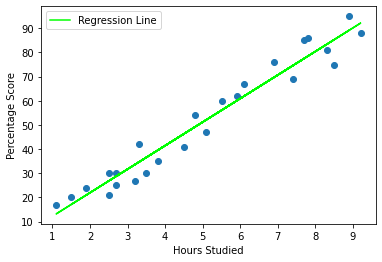

In [17]:
# Plotting the regression line
line = regressor.coef_*x + regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
#plotting line 
plt.plot(X, line,color='#00ff00', label='Regression Line')
# x-axis label
plt.xlabel('Hours Studied')  
#y-axis label
plt.ylabel('Percentage Score') 
plt.legend()
plt.show()

From the above graph result, we can see that both the graph, the intercepts, and coefficient are approximately identical. 
But as you can see, we needed to do alot of calculations for it. For avoiding these calculation, we can use the built-in function which are pretty easy and only needed a few lines of code.

**Step7: Making Predictions**<br>
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[4.5]
 [1.1]
 [5.9]
 [8.3]
 [8.9]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,41,46.333188
1,17,13.190276
2,62,59.980269
3,81,83.375266
4,95,89.224015


**Step8: Test and Evaluate the performance of the model.**

In [19]:
#Estimate the training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9426189496630859
Test Score: 0.9778064143884082


In [20]:
# Testing with some new data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.63578514198505


In [21]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.8627786559110517
Mean Squared Error: 17.20801853980377
Root Mean Squared Error: 4.148254878838061
R2: 0.9778064143884082


The value of R2 is 97.78% as which is 2% better than the R2 caluated value. So, this proves that for the given data the algorithm works very good. The accuracy of the model is 0.977, which is very good.

# Thank You !!